# This is the Test file for the CNN basic models(blur, night_vis, outline, poster)

Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd/autoencoder_blur_upd.keras
Loaded test images: (3, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
Generated outputs: (3, 256, 256, 3)
Saved results to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/blur


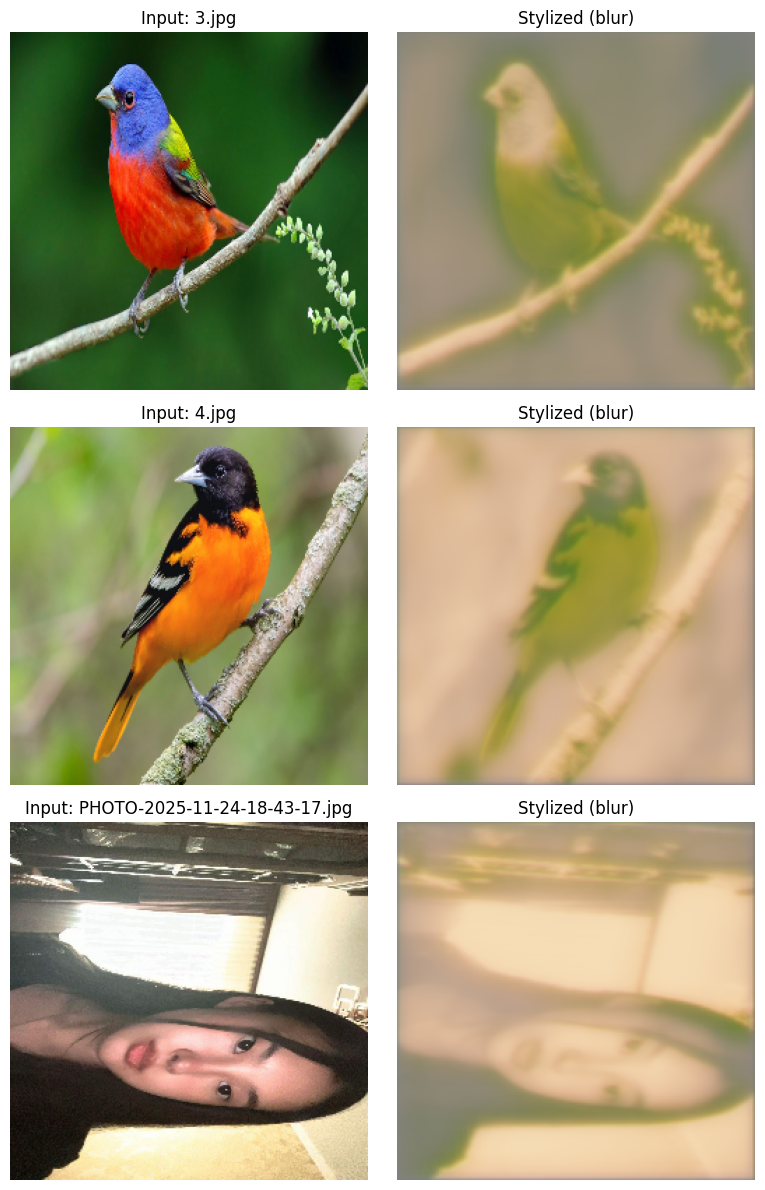

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLE = "blur"   
MODEL_PATH = os.path.join(MODEL_DIR, f"autoencoder_{STYLE}_upd.keras")

from tensorflow.keras.losses import MeanSquaredError

model = load_model(MODEL_PATH)

print("Loaded model:", MODEL_PATH)

IMAGE_SIZE = (256, 256)

def load_preprocessed_test_images(folder):
    imgs = []
    names = []

    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            continue

        path = os.path.join(folder, fname)

        img = cv2.imread(path, cv2.IMREAD_COLOR)            # LOAD COLOR
        if img is None:
            print(f"Skipping unreadable: {path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # BGR → RGB
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype("float32") / 255.0                 # Normalize to [0,1]

        imgs.append(img)
        names.append(fname)

    return np.array(imgs), names

test_imgs, test_names = load_preprocessed_test_images(BASE_TEST)

print("Loaded test images:", test_imgs.shape)

preds = model.predict(test_imgs)
print("Generated outputs:", preds.shape)


out_folder = os.path.join(RESULT_DIR, STYLE)
os.makedirs(out_folder, exist_ok=True)

for img_arr, fname in zip(preds, test_names):
    out = (img_arr * 255).astype("uint8")
    out = out.squeeze()  # remove channel dim
    cv2.imwrite(os.path.join(out_folder, fname), out)

print("Saved results to:", out_folder)

def show_results_grid(inputs, outputs, names, rows=6):
    n = min(len(inputs), rows)
    plt.figure(figsize=(8, n * 4))

    for i in range(n):
        inp = inputs[i].squeeze()
        out = outputs[i].squeeze()

        # Input image
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inp, cmap='gray')
        plt.title(f"Input: {names[i]}")
        plt.axis("off")

        # Stylized output
        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(out, cmap='gray')
        plt.title(f"Stylized ({STYLE})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_results_grid(test_imgs, preds, test_names, rows=3)


# import os

# MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models"
# print(os.listdir(MODEL_DIR))


Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd/autoencoder_night_vis_upd.keras
Loaded test images: (3, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
Generated outputs: (3, 256, 256, 3)
Saved results to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod/night_vis


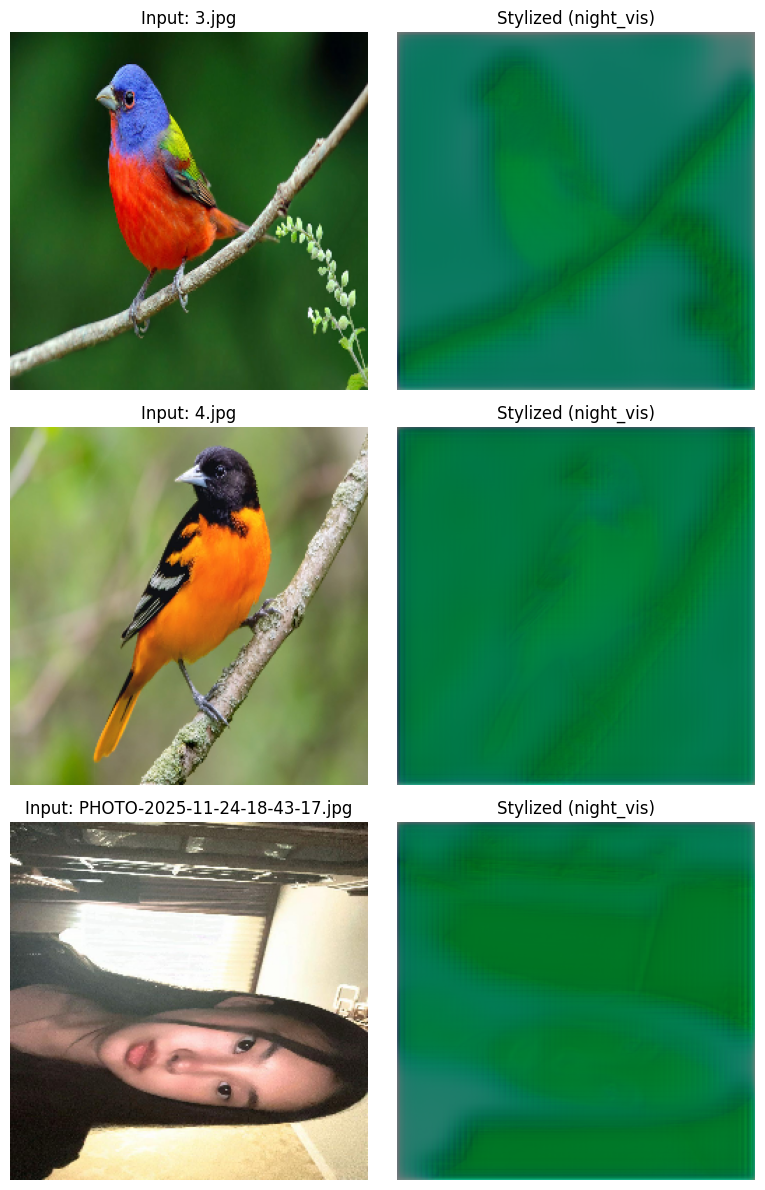

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLE = "night_vis"   
MODEL_PATH = os.path.join(MODEL_DIR, f"autoencoder_{STYLE}_upd.keras")

from tensorflow.keras.losses import MeanSquaredError

model = load_model(MODEL_PATH)

print("Loaded model:", MODEL_PATH)

IMAGE_SIZE = (256, 256)

def load_preprocessed_test_images(folder):
    imgs = []
    names = []

    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            continue

        path = os.path.join(folder, fname)

        img = cv2.imread(path, cv2.IMREAD_COLOR)            # LOAD COLOR
        if img is None:
            print(f"Skipping unreadable: {path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # BGR → RGB
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype("float32") / 255.0                 # Normalize to [0,1]

        imgs.append(img)
        names.append(fname)

    return np.array(imgs), names

test_imgs, test_names = load_preprocessed_test_images(BASE_TEST)

print("Loaded test images:", test_imgs.shape)

preds = model.predict(test_imgs)
print("Generated outputs:", preds.shape)


out_folder = os.path.join(RESULT_DIR, STYLE)
os.makedirs(out_folder, exist_ok=True)

for img_arr, fname in zip(preds, test_names):
    out = (img_arr * 255).astype("uint8")
    out = out.squeeze()  # remove channel dim
    cv2.imwrite(os.path.join(out_folder, fname), out)

print("Saved results to:", out_folder)

def show_results_grid(inputs, outputs, names, rows=6):
    n = min(len(inputs), rows)
    plt.figure(figsize=(8, n * 4))

    for i in range(n):
        inp = inputs[i].squeeze()
        out = outputs[i].squeeze()

        # Input image
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inp, cmap='gray')
        plt.title(f"Input: {names[i]}")
        plt.axis("off")

        # Stylized output
        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(out, cmap='gray')
        plt.title(f"Stylized ({STYLE})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_results_grid(test_imgs, preds, test_names, rows=3)


# import os

# MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models"
# print(os.listdir(MODEL_DIR))


Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd/autoencoder_outline_upd.keras
Loaded test images: (3, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
Generated outputs: (3, 256, 256, 3)
Saved results to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod/outline


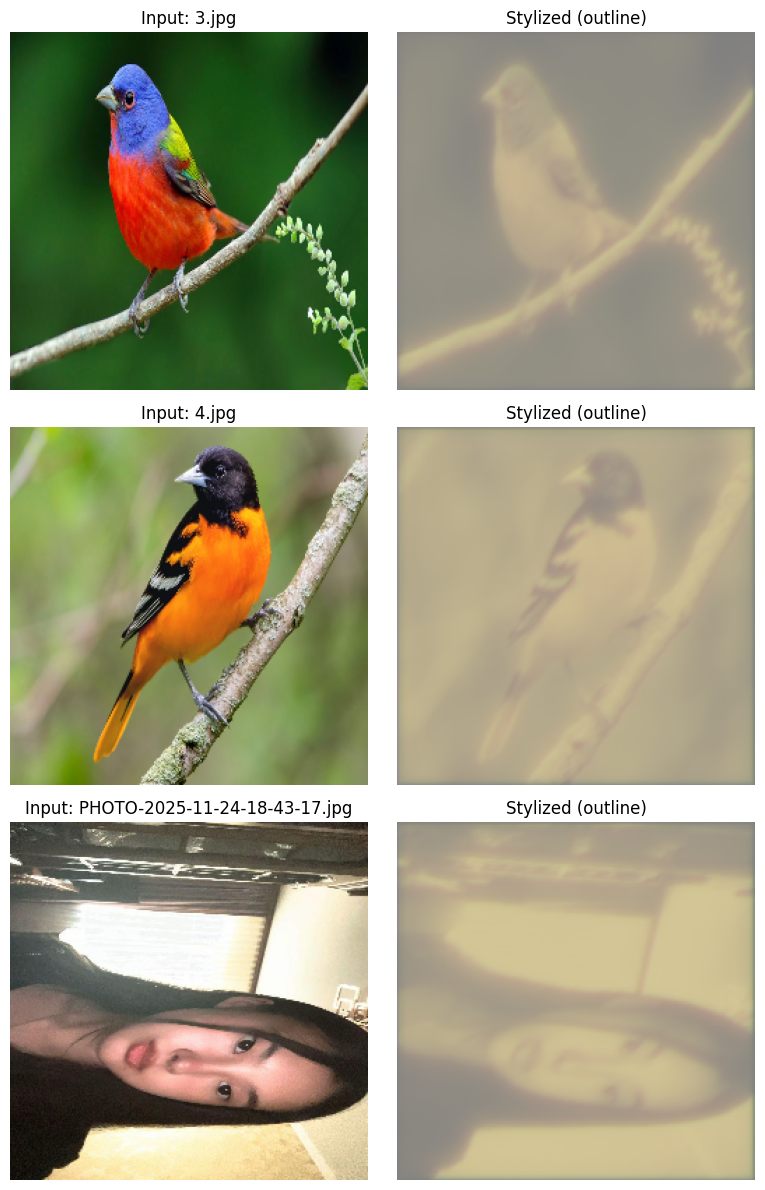

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLE = "outline"   
MODEL_PATH = os.path.join(MODEL_DIR, f"autoencoder_{STYLE}_upd.keras")

from tensorflow.keras.losses import MeanSquaredError

model = load_model(MODEL_PATH)

print("Loaded model:", MODEL_PATH)

IMAGE_SIZE = (256, 256)

def load_preprocessed_test_images(folder):
    imgs = []
    names = []

    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            continue

        path = os.path.join(folder, fname)

        img = cv2.imread(path, cv2.IMREAD_COLOR)            # LOAD COLOR
        if img is None:
            print(f"Skipping unreadable: {path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # BGR → RGB
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype("float32") / 255.0                 # Normalize to [0,1]

        imgs.append(img)
        names.append(fname)

    return np.array(imgs), names

test_imgs, test_names = load_preprocessed_test_images(BASE_TEST)

print("Loaded test images:", test_imgs.shape)

preds = model.predict(test_imgs)
print("Generated outputs:", preds.shape)


out_folder = os.path.join(RESULT_DIR, STYLE)
os.makedirs(out_folder, exist_ok=True)

for img_arr, fname in zip(preds, test_names):
    out = (img_arr * 255).astype("uint8")
    out = out.squeeze()  # remove channel dim
    cv2.imwrite(os.path.join(out_folder, fname), out)

print("Saved results to:", out_folder)

def show_results_grid(inputs, outputs, names, rows=6):
    n = min(len(inputs), rows)
    plt.figure(figsize=(8, n * 4))

    for i in range(n):
        inp = inputs[i].squeeze()
        out = outputs[i].squeeze()

        # Input image
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inp, cmap='gray')
        plt.title(f"Input: {names[i]}")
        plt.axis("off")

        # Stylized output
        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(out, cmap='gray')
        plt.title(f"Stylized ({STYLE})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_results_grid(test_imgs, preds, test_names, rows=3)


# import os

# MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models"
# print(os.listdir(MODEL_DIR))


Loaded model: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd/autoencoder_poster_upd.keras
Loaded test images: (3, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Generated outputs: (3, 256, 256, 3)
Saved results to: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod/poster


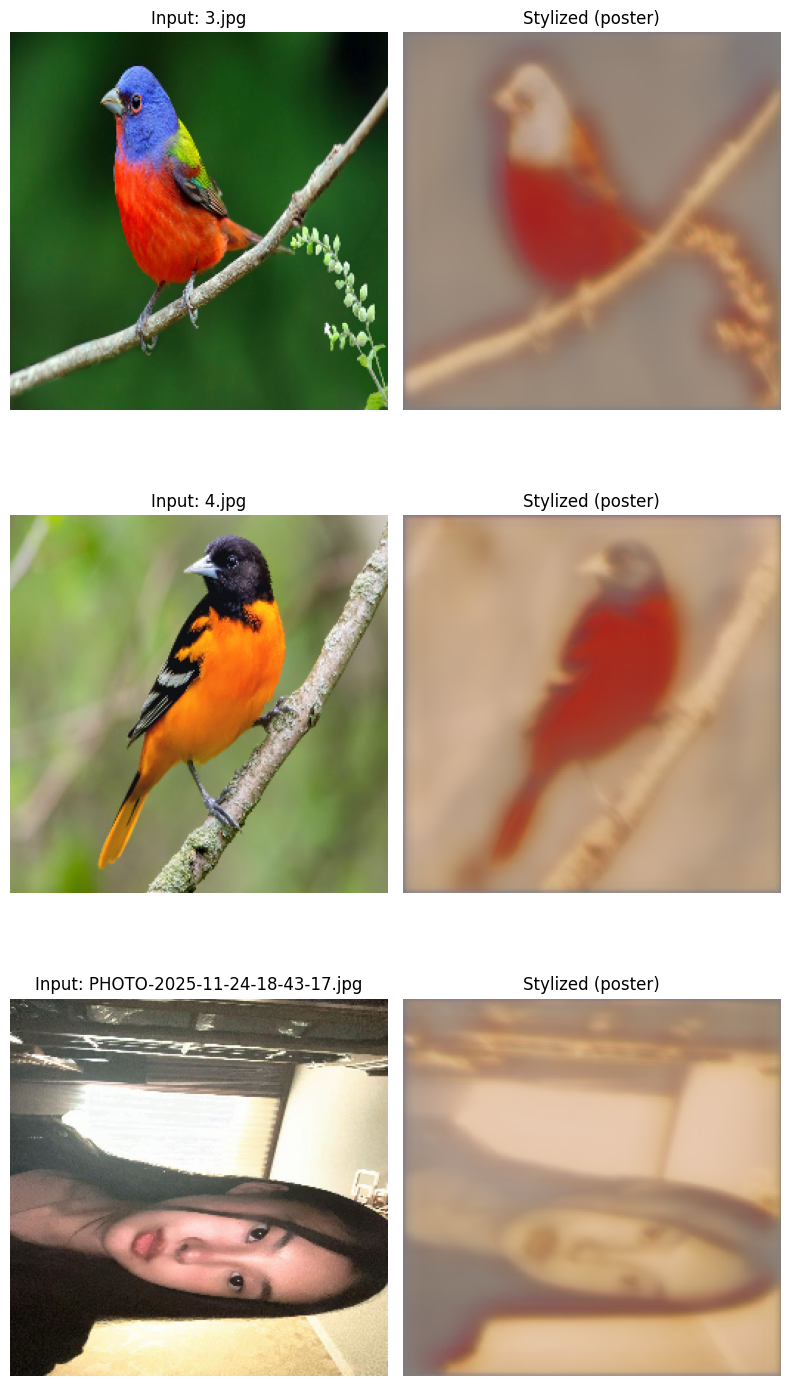

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results/adv_mod"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLE = "poster"   
MODEL_PATH = os.path.join(MODEL_DIR, f"autoencoder_{STYLE}_upd.keras")

from tensorflow.keras.losses import MeanSquaredError

model = load_model(MODEL_PATH)

print("Loaded model:", MODEL_PATH)

IMAGE_SIZE = (256, 256)

def load_preprocessed_test_images(folder):
    imgs = []
    names = []

    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            continue

        path = os.path.join(folder, fname)

        img = cv2.imread(path, cv2.IMREAD_COLOR)            # LOAD COLOR
        if img is None:
            print(f"Skipping unreadable: {path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # BGR → RGB
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype("float32") / 255.0                 # Normalize to [0,1]

        imgs.append(img)
        names.append(fname)

    return np.array(imgs), names

test_imgs, test_names = load_preprocessed_test_images(BASE_TEST)

print("Loaded test images:", test_imgs.shape)

preds = model.predict(test_imgs)
print("Generated outputs:", preds.shape)


out_folder = os.path.join(RESULT_DIR, STYLE)
os.makedirs(out_folder, exist_ok=True)

for img_arr, fname in zip(preds, test_names):
    out = (img_arr * 255).astype("uint8")
    out = out.squeeze()  # remove channel dim
    cv2.imwrite(os.path.join(out_folder, fname), out)

print("Saved results to:", out_folder)

def show_results_grid(inputs, outputs, names, rows=6):
    n = min(len(inputs), rows)
    plt.figure(figsize=(8, n * 5))

    for i in range(n):
        inp = inputs[i].squeeze()
        out = outputs[i].squeeze()

        # Input image
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inp, cmap='gray')
        plt.title(f"Input: {names[i]}")
        plt.axis("off")

        # Stylized output
        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(out, cmap='gray')
        plt.title(f"Stylized ({STYLE})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_results_grid(test_imgs, preds, test_names, rows=3)


# import os

# MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models"
# print(os.listdir(MODEL_DIR))


# Evaluation

In [21]:
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# from sklearn.model_selection import train_test_split

# from skimage.metrics import peak_signal_noise_ratio as psnr
# from skimage.metrics import structural_similarity as ssim

# # -------- PATHS --------
# BASE_INPUT = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/data/preprocessed/input"
# STYLE_ROOT = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/data/preprocessed/style"
# MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"

# STYLES = ["blur", "night_vis", "poster", "outline"]
# IMAGE_SIZE = (256, 256)


# # -------- HELPERS --------
# def load_images_from_folder(folder, size=IMAGE_SIZE):
#     imgs = []
#     files = sorted([
#         f for f in os.listdir(folder)
#         if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tiff"))
#     ])
#     for fname in files:
#         path = os.path.join(folder, fname)
#         img = cv2.imread(path)
#         if img is None:
#             print("Skipping:", fname)
#             continue
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, size)
#         img = img.astype("float32") / 255.0
#         imgs.append(img)
#     return np.array(imgs)


# def compute_metrics(y_true, y_pred):
#     """
#     y_true, y_pred: arrays in [0,1], shape (N,256,256,3)
#     Returns MAE, MSE, PSNR, SSIM
#     """

#     mae = np.mean(np.abs(y_true - y_pred))
#     mse = np.mean((y_true - y_pred)**2)

#     # PSNR per image
#     psnr_vals = [
#         psnr(y_true[i], y_pred[i], data_range=1.0)
#         for i in range(len(y_true))
#     ]
#     mean_psnr = np.mean(psnr_vals)

#     # SSIM per image
#     ssim_vals = [
#         ssim(y_true[i], y_pred[i], channel_axis=-1, data_range=1.0)
#         for i in range(len(y_true))
#     ]
#     mean_ssim = np.mean(ssim_vals)

#     return mae, mse, mean_psnr, mean_ssim


# # ============================================
# # RUN METRICS FOR EACH STYLE
# # ============================================

# results = {}

# print("Loading base input images...")
# input_images = load_images_from_folder(BASE_INPUT)

# for style in STYLES:
#     print("\n========================================")
#     print(f" Evaluating style: {style.upper()}")
#     print("========================================")

#     # Load ground truth style images
#     style_folder = os.path.join(STYLE_ROOT, style)
#     style_images = load_images_from_folder(style_folder)

#     if len(style_images) != len(input_images):
#         print(f"[ERROR] Count mismatch for {style}:",
#               len(input_images), "inputs vs", len(style_images), "targets")
#         continue

#     # Split test set (15%)
#     X_train, X_test, y_train, y_test = train_test_split(
#         input_images, style_images,
#         test_size=0.15,
#         random_state=42
#     )

#     # Load model
#     model_path = os.path.join(MODEL_DIR, f"autoencoder_{style}_upd.keras")
#     print("Loading model:", model_path)

#     model = load_model(model_path)

#     # Predict on test set
#     y_pred = model.predict(X_test)

#     # Compute metrics
#     mae, mse, psnr_val, ssim_val = compute_metrics(y_test, y_pred)
#     results[style] = (mae, mse, psnr_val, ssim_val)

#     print(f"MAE :  {mae:.6f}")
#     print(f"MSE :  {mse:.6f}")
#     print(f"PSNR: {psnr_val:.3f} dB")
#     print(f"SSIM: {ssim_val:.4f}")

# # ============================================
# # CLEAN SUMMARY TABLE
# # ============================================

# print("\n\n========================================")
# print("FINAL METRICS SUMMARY")
# print("========================================")

# for style, (mae, mse, p, s) in results.items():
#     print(f"\n----- {style.upper()} -----")
#     print(f"MAE :  {mae:.6f}")
#     print(f"MSE :  {mse:.6f}")
#     print(f"PSNR: {p:.3f} dB")
#     print(f"SSIM: {s:.4f}")
